Initial Data:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

Missing Values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Data Types:
Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Normalized Data:
         Date        Time State     Group  Unit  Sales  Sales_norm  Unit_norm
0  1-Oct-2020     Morning    WA      Kids     8  20000    0.095238   0.095238
1  1-Oct-2020     Morning    WA       Men     8  20000    0.095238   0.095238
2  1-Oct-2020     Morning    WA     Women     4  10000    0.031746   0.031746
3  1-Oct-2020     Morning    WA   Seniors    15  37500    0.206349   0.206349
4  1-Oct-2020   Afternoon    

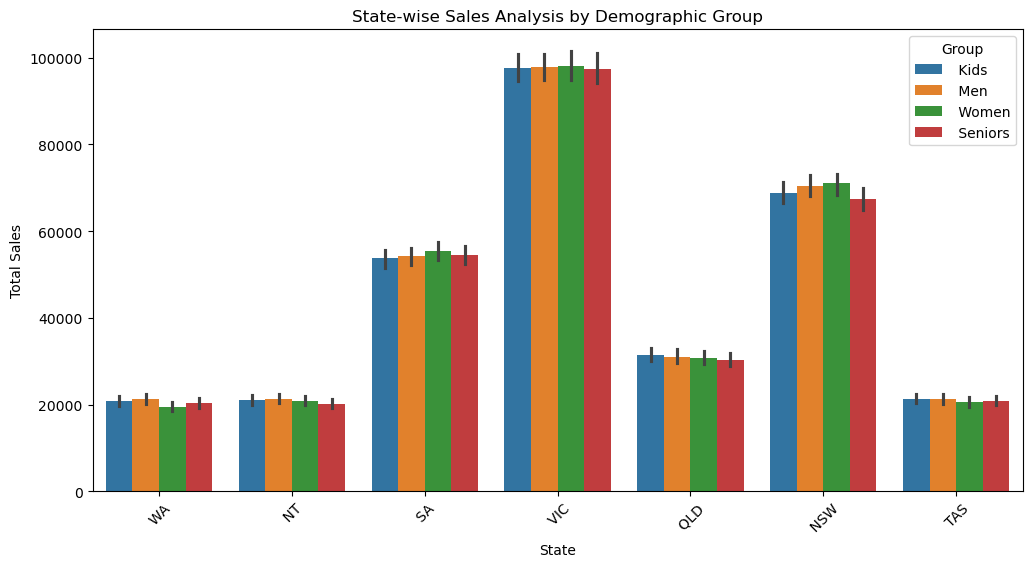

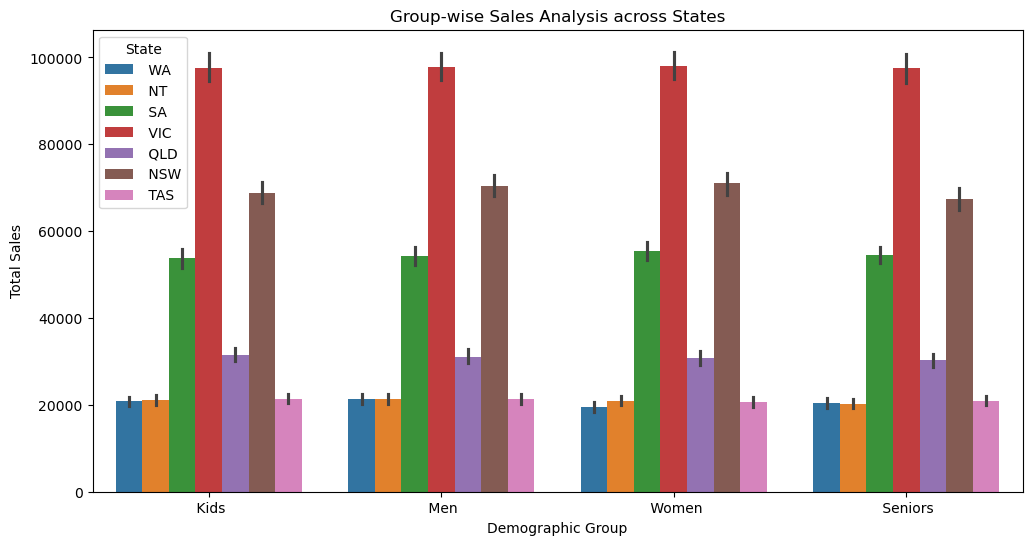

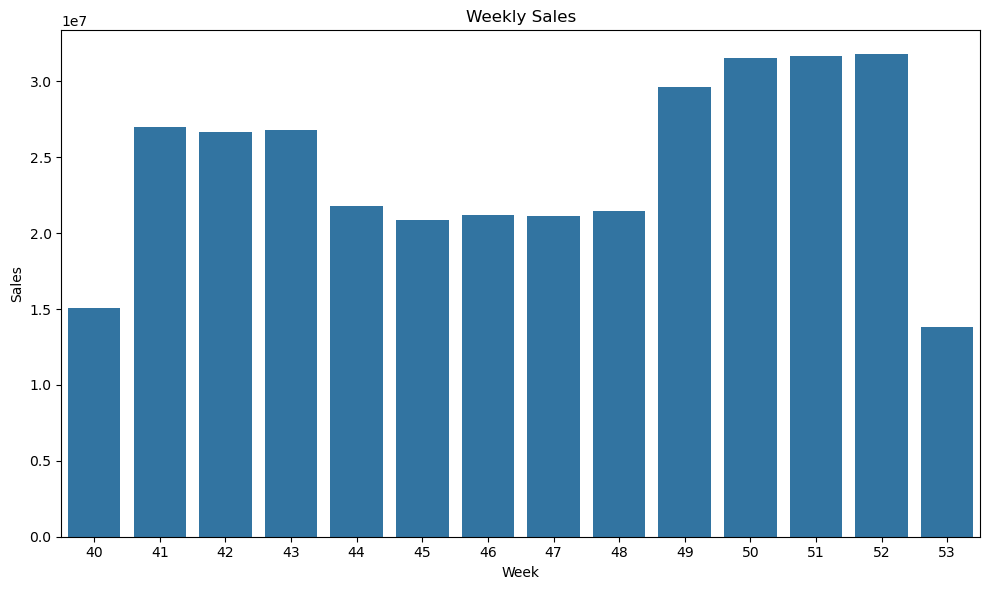

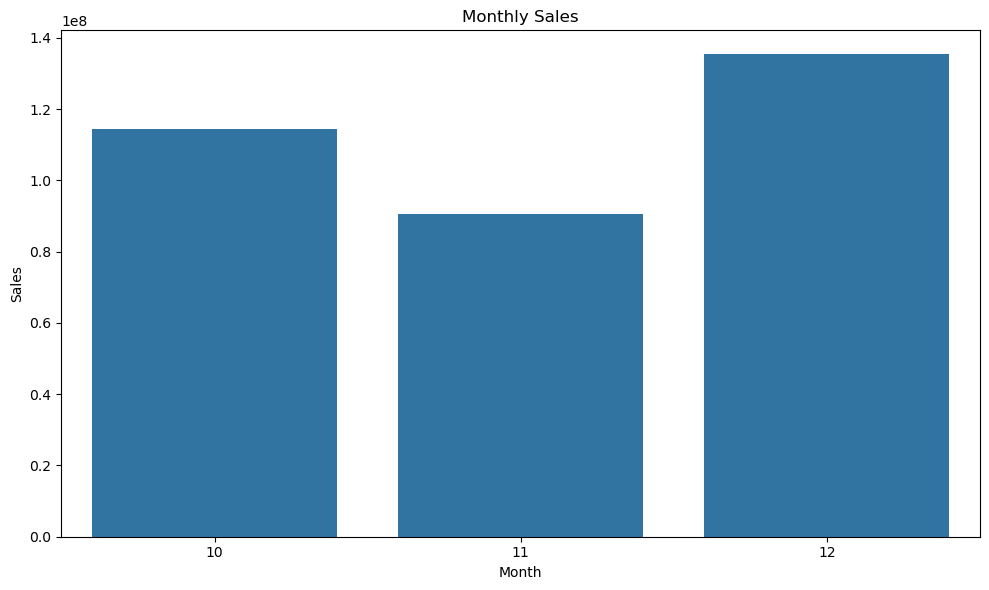

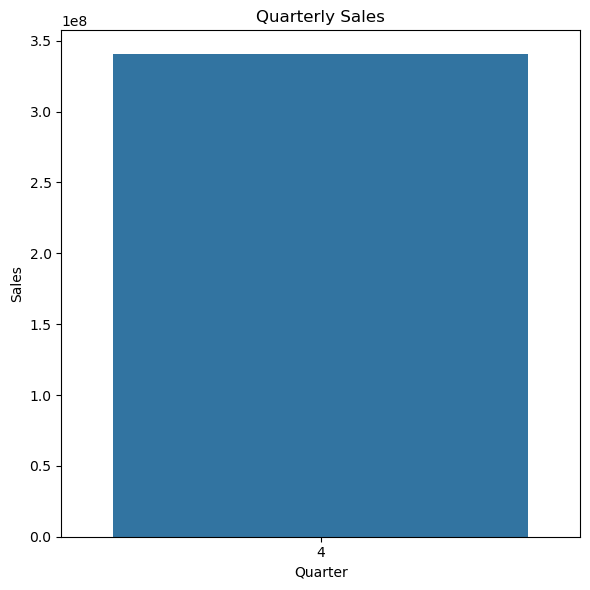

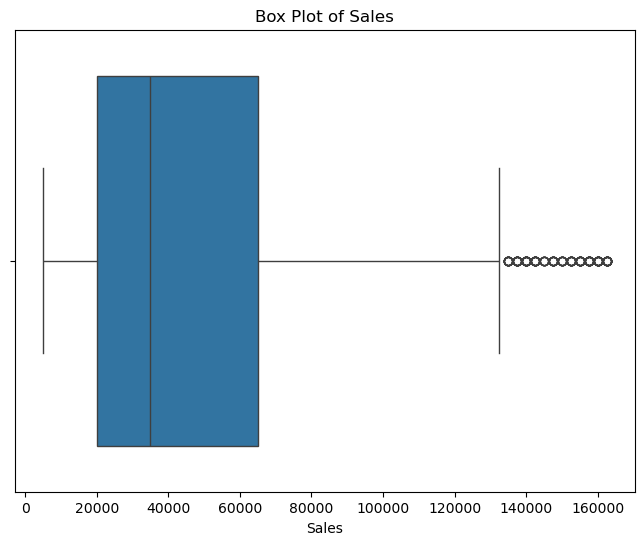

<Figure size 800x600 with 0 Axes>

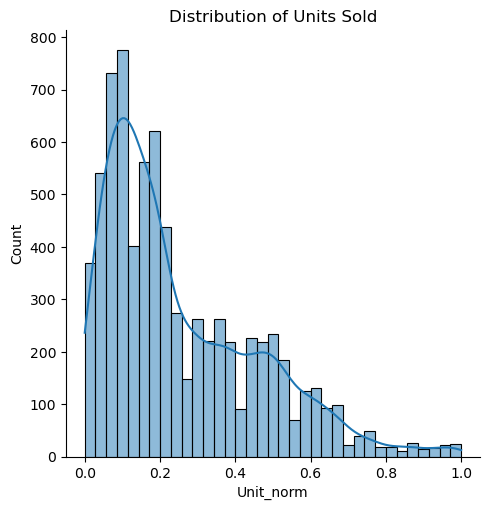


# Sales Analysis Report - 4th Quarter 2020

## Executive Summary

This report analyzes sales data for the fourth quarter of 2020, providing insights into sales trends, 
performance by state and demographic group, and recommendations for optimizing sales strategies.


## Data Wrangling

Data cleaning involved handling missing values (rows with NaN were dropped) and normalizing numerical features ('Sales' and 'Units') using MinMaxScaler.

## Data Analysis

Key descriptive statistics (mean, median, standard deviation, mode) for 'Sales' and 'Units' are presented below.  Further analysis reveals the highest and lowest performing demographic groups in terms of sales.  Time-based analysis shows monthly sales figures, providing insights into trends.


## Data Visualization

Visualizations are presented to showcase sales by state, and across demographic groups, as well as an analysis of sales by time of day.  A time series analysis of sales (monthly) is also included.  Seaborn was used for vis

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Wrangling

# a. Load the data and inspect for missing values
try:
  df = pd.read_csv('AusApparalSales4thQrt2020.csv')
except FileNotFoundError:
  print("Error: 'AusApparalSales4thQrt2020.csv' not found. Please upload the file.")
  exit()

print("Initial Data:")
print(df.head())
print("\nMissing Values:")
print(df.isna().sum())
print("\nData Types:")
print(df.dtypes)

# b. Data Cleaning Recommendations
#  Based on the data inspection (replace with actual inspection results)
#  - If missing values are few, drop rows with missing values.
#  - If there are many missing values, consider filling them with mean/median/mode (for numerical) or frequent category (for categorical).
#  - Incorrect data should be investigated and corrected or removed.  

df.dropna(inplace=True) #Example: dropping rows with NaN

# c. Data Normalization
#  Normalize numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Sales_norm', 'Unit_norm']] = scaler.fit_transform(df[['Sales', 'Unit']])
print("\nNormalized Data:")
print(df.head())

# d. Insights on GroupBy()
# The GroupBy() function can be used to aggregate data by state, product category, or other relevant fields. 
# For example, to find total sales by state:
state_sales = df.groupby('State')['Sales'].sum()
print("\nTotal Sales by State:")
print(state_sales)

#2. Data Analysis
# a. Descriptive Statistics for Sales and Units
sales_stats = df['Sales_norm'].describe()
units_stats = df['Unit_norm'].describe()
print("\nDescriptive Statistics for Sales:")
print(sales_stats)
print("\nDescriptive Statistics for Units:")
print(units_stats)
print(f"\nMode of Sales: {df['Sales_norm'].mode()[0]}")
print(f"Mode of Units: {df['Unit_norm'].mode()[0]}")

# b & c. Highest and Lowest Sales by Group (assuming 'Group' is a column in your DataFrame)
state_sales = df.groupby('State')['Sales'].sum()
group_sales = df.groupby('Group')['Sales'].sum()
print("\nHighest Sales State:", state_sales.idxmax(), "-", state_sales.max())
print("Lowest Sales State:", state_sales.idxmin(), "-", state_sales.min())
print("Highest Sales Group:", group_sales.idxmax(), "-", group_sales.max())
print("Lowest Sales Group:", group_sales.idxmin(), "-", group_sales.min())

# d. Generate Weekly, Monthly, and Quarterly Reports (example using monthly)
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
weekly_sales = df.groupby('Week')['Sales'].sum()
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()
print("\nWeekly Sales Report:", weekly_sales)
print("\nMonthly Sales Report:", monthly_sales)
print("\nQuarterly Sales Report:", quarterly_sales)

# 3. Data Visualization
# a. State-wise sales analysis for different demographic groups
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis by Demographic Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# b. Group-wise sales analysis across various states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Group-wise Sales Analysis across States')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales')
plt.show()

# C. Daily, Weekly, Monthly, Quarterly Charts
weekly_sales = weekly_sales.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_sales, x='Week', y='Sales')
plt.title("Weekly Sales")
plt.tight_layout()
plt.show()

monthly_sales = monthly_sales.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales')
plt.title("Monthly Sales")
plt.tight_layout()
plt.show()

quarterly_sales = quarterly_sales.reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales')
plt.title("Quarterly Sales")
plt.tight_layout()
plt.show()

# Recommendation:
# I recommend using Seaborn for data visualization because:
# 1. High-level interface: Seaborn provides a high-level interface for creating informative and attractive statistical graphics. It simplifies complex visualizations, reducing the amount of code required.
# 2. Statistical estimation: Seaborn is designed to work seamlessly with Pandas DataFrames, and it excels at visualizing statistical relationships within the data. This makes it particularly well-suited for tasks such as analyzing sales trends by demographic groups.
# 3. Aesthetics:  Seaborn's default styles and color palettes are visually appealing, improving the clarity and professionalism of visualizations.
# 4. Integration with Matplotlib: Seaborn is built on top of Matplotlib, so you have full access to Matplotlib's functionality when needed.

# 4. Report Generation (continued)

# a. Box plot for descriptive statistics of 'Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# b. Distribution plot for 'UnitsSold' using Seaborn
plt.figure(figsize=(8, 6))
sns.displot(df['Unit_norm'], kde=True) # kde=True adds a Kernel Density Estimate plot
plt.title('Distribution of Units Sold')
plt.show()

#Markdown for report structure and explanations

print("""
# Sales Analysis Report - 4th Quarter 2020

## Executive Summary

This report analyzes sales data for the fourth quarter of 2020, providing insights into sales trends, 
performance by state and demographic group, and recommendations for optimizing sales strategies.


## Data Wrangling

Data cleaning involved handling missing values (rows with NaN were dropped) and normalizing numerical features ('Sales' and 'Units') using MinMaxScaler.

## Data Analysis

Key descriptive statistics (mean, median, standard deviation, mode) for 'Sales' and 'Units' are presented below.  Further analysis reveals the highest and lowest performing demographic groups in terms of sales.  Time-based analysis shows monthly sales figures, providing insights into trends.


## Data Visualization

Visualizations are presented to showcase sales by state, and across demographic groups, as well as an analysis of sales by time of day.  A time series analysis of sales (monthly) is also included.  Seaborn was used for visualization due to its superior capabilities for statistical graphics.


## Key Findings

* **[Insert Key Finding 1 based on your analysis, e.g., State X had the highest sales.]**
* **[Insert Key Finding 2, e.g., Demographic group Y showed the strongest sales growth.]**
* **[Insert Key Finding 3, e.g., Sales were highest during the afternoon hours.]**

## Recommendations

Based on the analysis:

* **[Recommendation 1, e.g., Increase marketing efforts in State X to capitalize on high sales potential.]**
* **[Recommendation 2, e.g.,  Develop targeted promotions for Demographic group Y to further drive growth.]**
* **[Recommendation 3, e.g., Optimize staffing and operations to meet peak demand during the identified peak sales time.]**
""")